In [27]:
import pandas as pd
# read data
df = pd.read_csv('./news_10_category_cleaned_6k.csv')

In [28]:
X = df['text']
y = df['category']

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(X)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['category'])

In [31]:
import pandas as pd
df = pd.DataFrame({'text': X, 'category': y})

In [32]:
from pycaret.classification import *

In [33]:
s = setup(df, target = 'category', session_id=123)

,Description,Value
0,Session id,123
1,Target,category
2,Target type,Multiclass
3,Original data shape,"(5761, 2)"
4,Transformed data shape,"(5761, 2)"
5,Transformed train set shape,"(4032, 2)"
6,Transformed test set shape,"(1729, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


In [34]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [38]:
exp.setup(df,text_features=['text'], target='category', session_id=123)

,Description,Value
0,Session id,123
1,Target,category
2,Target type,Multiclass
3,Original data shape,"(5761, 2)"
4,Transformed data shape,"(5761, 14448)"
5,Transformed train set shape,"(4032, 14448)"
6,Transformed test set shape,"(1729, 14448)"
7,Text features,1
8,Preprocess,True
9,Imputation type,simple


In [39]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.2230
knn,K Neighbors Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0090
nb,Naive Bayes,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0060
dt,Decision Tree Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0060
ridge,Ridge Classifier,0.1369,0.0000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0060
rf,Random Forest Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0320
ada,Ada Boost Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0190
gbc,Gradient Boosting Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.1600
lda,Linear Discriminant Analysis,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0070
et,Extra Trees Classifier,0.1369,0.5000,0.1369,0.0187,0.0330,0.0000,0.0000,0.0300


### Analyze Model

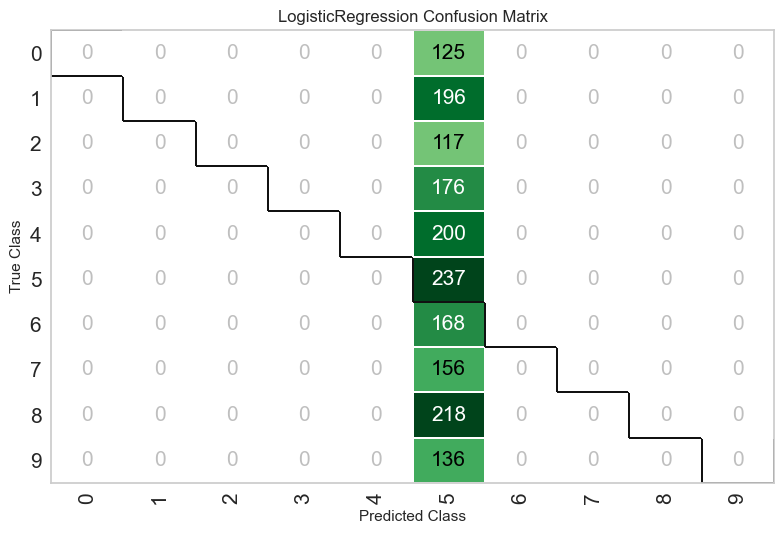

In [40]:
plot_model(best, plot='confusion_matrix')

### Follow the nlp tutorial https://github.com/prateek025/nlp-using-pycaret/blob/master/Spam-Ham.ipynb

In [67]:
df = pd.read_csv('./news_10_category_cleaned_6k.csv')
df.columns

Index(['category', 'text'], dtype='object')

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

In [69]:
#df = pd.get_dummies(df, columns=['category'], drop_first=True)
df.head()

,category,text
0,4,dad just stressed mom according new poll
1,6,everything need know makeup expiration date vi...
2,4,mother day 2013 photo challenge see way child ...
3,5,since sandra bland hundred suicide american ja...
4,9,disabled prisoner raped abused kept solitary a...


In [120]:
df1 = df
X = df1['text']
Y = df1['category']

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

In [121]:
# BOW-TF Embedding
no_features = 1000
c_vectorizer = CountVectorizer(max_df=0.8, min_df=0.015, max_features=no_features, ngram_range=[1,3])
c_vectors = c_vectorizer.fit_transform(X)
print(f"shape of BOW-TF embedding: {c_vectors.shape}")

shape of BOW-TF embedding: (5761, 119)


In [122]:
# TF-IDF Embedding
tfidf_vectorizer = TfidfVectorizer()
tf_vectors = tfidf_vectorizer.fit_transform(X)
print(f"shape of TF-IDF embedding: {tf_vectors.shape}")

shape of TF-IDF embedding: (5761, 17601)


In [113]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    #print(f'y_pred:{Y_pred}')
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'd', cmap='RdBu',
                xticklabels=set(Y_test), yticklabels=set(Y_test))
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred), 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='macro'), 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='macro'), 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    #fpr, tpr, threshold = roc_curve(Y_test, preds)
    #roc_auc = auc(fpr, tpr)
    #print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    #plt.figure()
    #plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    #plt.plot([0.0, 1.0], [0, 1],'r--')
    #plt.xlim([-0.1, 1.1])
    #plt.ylim([-0.1, 1.1])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('RoC-AUC on Test Data')
    #plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    #plt.show()
    print("--------------------------------------------------------------------------")

In [119]:
def model_dvt(X, Y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    
    print("\n", 'Logistic Regression')
    clf = LogisticRegression(random_state=21)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (4608, 119)
Test Data Dimensions :  (1153, 119)

 Logistic Regression

 Confusion Matrix


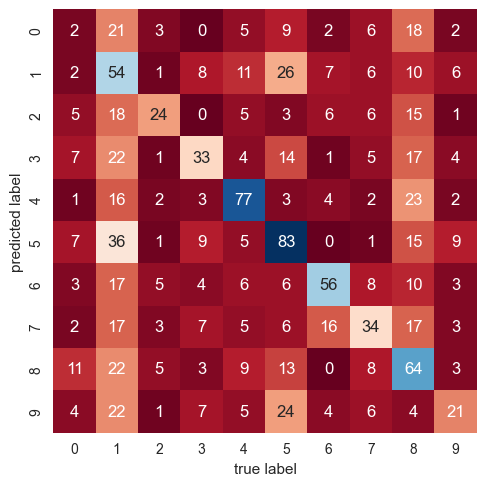


 Classification Report 

              precision    recall  f1-score   support

           0       0.05      0.03      0.04        68
           1       0.22      0.41      0.29       131
           2       0.52      0.29      0.37        83
           3       0.45      0.31      0.36       108
           4       0.58      0.58      0.58       133
           5       0.44      0.50      0.47       166
           6       0.58      0.47      0.52       118
           7       0.41      0.31      0.35       110
           8       0.33      0.46      0.39       138
           9       0.39      0.21      0.28        98

    accuracy                           0.39      1153
   macro avg       0.40      0.36      0.36      1153
weighted avg       0.41      0.39      0.39      1153

Overall Accuracy :  0.39
Precision Score :  0.4
Recall Score :  0.36
--------------------------------------------------------------------------

 Random Forest Classifier

 Confusion Matrix


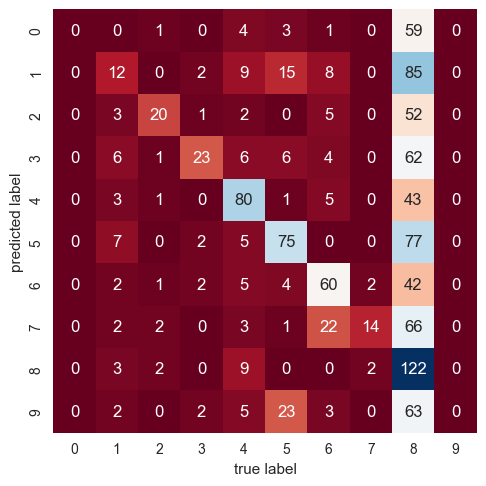


 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.30      0.09      0.14       131
           2       0.71      0.24      0.36        83
           3       0.72      0.21      0.33       108
           4       0.62      0.60      0.61       133
           5       0.59      0.45      0.51       166
           6       0.56      0.51      0.53       118
           7       0.78      0.13      0.22       110
           8       0.18      0.88      0.30       138
           9       0.00      0.00      0.00        98

    accuracy                           0.35      1153
   macro avg       0.45      0.31      0.30      1153
weighted avg       0.46      0.35      0.33      1153

Overall Accuracy :  0.35
Precision Score :  0.45
Recall Score :  0.31
--------------------------------------------------------------------------

 AdaBoost Classifier

 Confusion Matrix


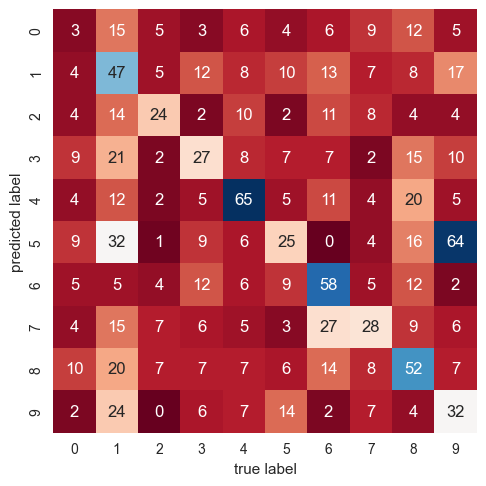


 Classification Report 

              precision    recall  f1-score   support

           0       0.06      0.04      0.05        68
           1       0.23      0.36      0.28       131
           2       0.42      0.29      0.34        83
           3       0.30      0.25      0.27       108
           4       0.51      0.49      0.50       133
           5       0.29      0.15      0.20       166
           6       0.39      0.49      0.43       118
           7       0.34      0.25      0.29       110
           8       0.34      0.38      0.36       138
           9       0.21      0.33      0.26        98

    accuracy                           0.31      1153
   macro avg       0.31      0.30      0.30      1153
weighted avg       0.32      0.31      0.31      1153

Overall Accuracy :  0.31
Precision Score :  0.31
Recall Score :  0.3
--------------------------------------------------------------------------

 Grdient Boosting Classifier

 Confusion Matrix


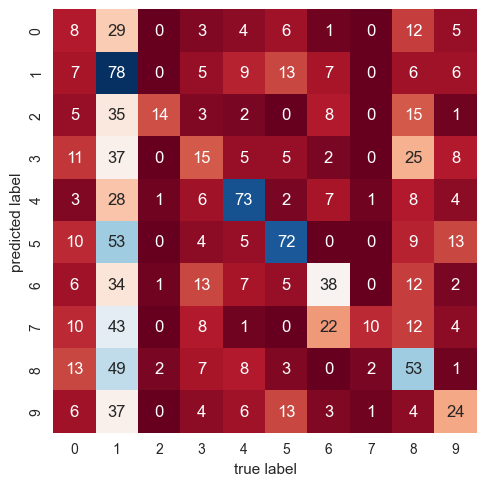


 Classification Report 

              precision    recall  f1-score   support

           0       0.10      0.12      0.11        68
           1       0.18      0.60      0.28       131
           2       0.78      0.17      0.28        83
           3       0.22      0.14      0.17       108
           4       0.61      0.55      0.58       133
           5       0.61      0.43      0.51       166
           6       0.43      0.32      0.37       118
           7       0.71      0.09      0.16       110
           8       0.34      0.38      0.36       138
           9       0.35      0.24      0.29        98

    accuracy                           0.33      1153
   macro avg       0.43      0.30      0.31      1153
weighted avg       0.44      0.33      0.33      1153

Overall Accuracy :  0.33
Precision Score :  0.43
Recall Score :  0.3
--------------------------------------------------------------------------

 Naive Bayes Classifier

 Confusion Matrix


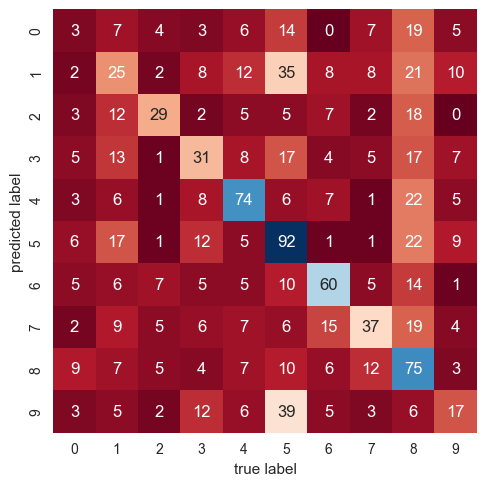


 Classification Report 

              precision    recall  f1-score   support

           0       0.07      0.04      0.06        68
           1       0.23      0.19      0.21       131
           2       0.51      0.35      0.41        83
           3       0.34      0.29      0.31       108
           4       0.55      0.56      0.55       133
           5       0.39      0.55      0.46       166
           6       0.53      0.51      0.52       118
           7       0.46      0.34      0.39       110
           8       0.32      0.54      0.40       138
           9       0.28      0.17      0.21        98

    accuracy                           0.38      1153
   macro avg       0.37      0.35      0.35      1153
weighted avg       0.38      0.38      0.37      1153

Overall Accuracy :  0.38
Precision Score :  0.37
Recall Score :  0.35
--------------------------------------------------------------------------


In [123]:
print('Models on Term Frequency - Bag of Words data')
model_dvt(c_vectors, Y)

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (4608, 17601)
Test Data Dimensions :  (1153, 17601)

 Logistic Regression

 Confusion Matrix


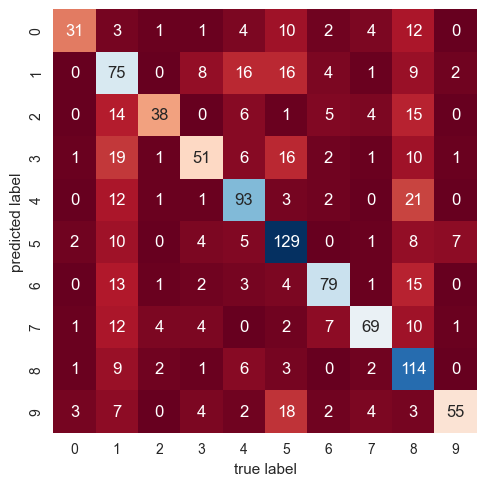


 Classification Report 

              precision    recall  f1-score   support

           0       0.79      0.46      0.58        68
           1       0.43      0.57      0.49       131
           2       0.79      0.46      0.58        83
           3       0.67      0.47      0.55       108
           4       0.66      0.70      0.68       133
           5       0.64      0.78      0.70       166
           6       0.77      0.67      0.71       118
           7       0.79      0.63      0.70       110
           8       0.53      0.83      0.64       138
           9       0.83      0.56      0.67        98

    accuracy                           0.64      1153
   macro avg       0.69      0.61      0.63      1153
weighted avg       0.67      0.64      0.64      1153

Overall Accuracy :  0.64
Precision Score :  0.69
Recall Score :  0.61
--------------------------------------------------------------------------

 Random Forest Classifier

 Confusion Matrix


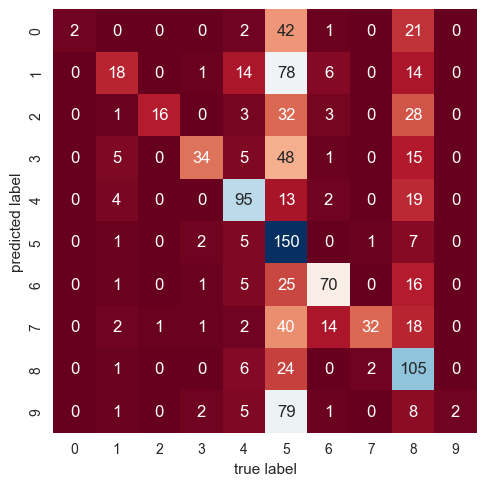


 Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        68
           1       0.53      0.14      0.22       131
           2       0.94      0.19      0.32        83
           3       0.83      0.31      0.46       108
           4       0.67      0.71      0.69       133
           5       0.28      0.90      0.43       166
           6       0.71      0.59      0.65       118
           7       0.91      0.29      0.44       110
           8       0.42      0.76      0.54       138
           9       1.00      0.02      0.04        98

    accuracy                           0.45      1153
   macro avg       0.73      0.40      0.38      1153
weighted avg       0.68      0.45      0.41      1153

Overall Accuracy :  0.45
Precision Score :  0.73
Recall Score :  0.4
--------------------------------------------------------------------------

 AdaBoost Classifier

 Confusion Matrix


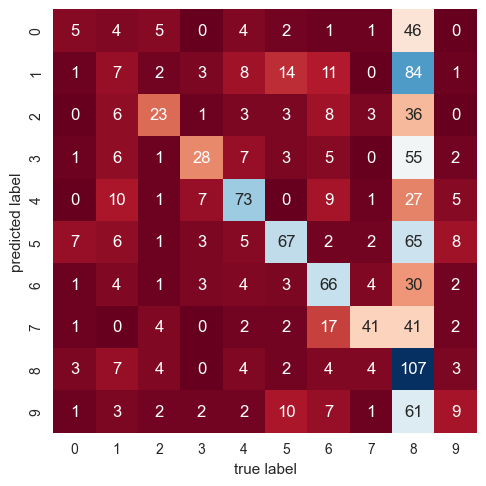


 Classification Report 

              precision    recall  f1-score   support

           0       0.25      0.07      0.11        68
           1       0.13      0.05      0.08       131
           2       0.52      0.28      0.36        83
           3       0.60      0.26      0.36       108
           4       0.65      0.55      0.60       133
           5       0.63      0.40      0.49       166
           6       0.51      0.56      0.53       118
           7       0.72      0.37      0.49       110
           8       0.19      0.78      0.31       138
           9       0.28      0.09      0.14        98

    accuracy                           0.37      1153
   macro avg       0.45      0.34      0.35      1153
weighted avg       0.46      0.37      0.37      1153

Overall Accuracy :  0.37
Precision Score :  0.45
Recall Score :  0.34
--------------------------------------------------------------------------

 Grdient Boosting Classifier

 Confusion Matrix


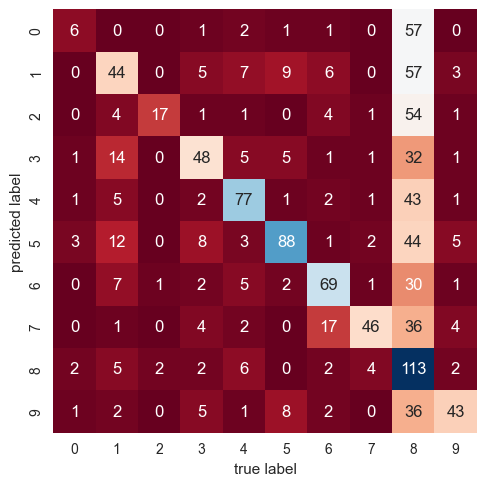


 Classification Report 

              precision    recall  f1-score   support

           0       0.43      0.09      0.15        68
           1       0.47      0.34      0.39       131
           2       0.85      0.20      0.33        83
           3       0.62      0.44      0.52       108
           4       0.71      0.58      0.64       133
           5       0.77      0.53      0.63       166
           6       0.66      0.58      0.62       118
           7       0.82      0.42      0.55       110
           8       0.23      0.82      0.35       138
           9       0.70      0.44      0.54        98

    accuracy                           0.48      1153
   macro avg       0.62      0.44      0.47      1153
weighted avg       0.62      0.48      0.49      1153

Overall Accuracy :  0.48
Precision Score :  0.62
Recall Score :  0.44
--------------------------------------------------------------------------

 Naive Bayes Classifier

 Confusion Matrix


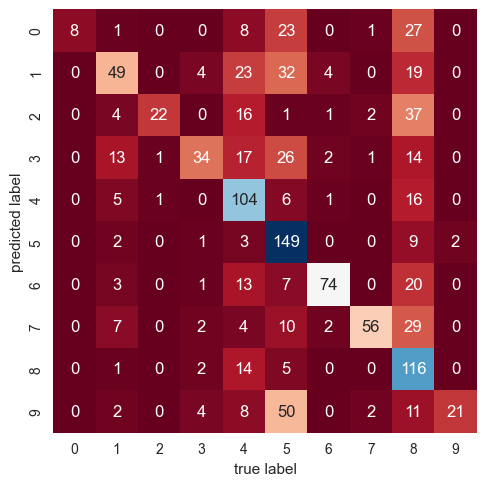


 Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.12      0.21        68
           1       0.56      0.37      0.45       131
           2       0.92      0.27      0.41        83
           3       0.71      0.31      0.44       108
           4       0.50      0.78      0.61       133
           5       0.48      0.90      0.63       166
           6       0.88      0.63      0.73       118
           7       0.90      0.51      0.65       110
           8       0.39      0.84      0.53       138
           9       0.91      0.21      0.35        98

    accuracy                           0.55      1153
   macro avg       0.73      0.49      0.50      1153
weighted avg       0.68      0.55      0.52      1153

Overall Accuracy :  0.55
Precision Score :  0.73
Recall Score :  0.49
--------------------------------------------------------------------------


In [124]:
print('Models on Term Frequency - Bag of Words data')
model_dvt(tf_vectors, Y)